In [1]:
import cv2
import numpy as np
import PIL
import io
import html
import time
import imageio
import matplotlib.pyplot as plt
import BodyTracker as Bt
from utils import *
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
from dtaidistance import dtw_ndim

numpy.ndarray size changed, may indicate binary incompatibility. Expected 96 from C header, got 80 from PyObject


In [2]:
def pose(img):
    pTime = 0    
    lmList=[]

    nframes=30 # is the number of saved frames for the function live_tracker
    iterator=0
    angles=[]
    refTime=time.time()
    tracker=live_tracker(nframes)

     #positioning of text and dimensions
    h_angle=50
    w_angle=100
    h_j=65
    w_j=w_angle
    fontScale=2
    thickness=2

    width,height, c=img.shape
    size=(width, height)
    #writer= cv2.VideoWriter('runpose.mp4', cv2.VideoWriter_fourcc('M','J','P','G'), 20, (width,height))
    img = detector.findPose(img)
    lmList = detector.findPosition(img)
    #print(img)
    points=[12, 14, 16]
    p=points
    maxim=max(points)
    angle=0
    lmList1=[]
    inf=60
    sup=140
    #draw angle and perform evaluation
    """if(maxim>len(lmList)):
        draw=False
    if(search(lmList, p[0])  and search(lmList, p[1] ) ) and ( search(lmList, p[2]) ):
        draw=True"""
    angle=detector.findAngle(img, p[0], p[1], p[2]), 
    angles.append(angle)
    if(True):
        judge(img, angle, inf, sup)
    cTime = time.time()
    fps = 1 / (cTime - pTime)
    pTime = cTime
    lmList1.append(lmList)
    #cv2.imshow("Capture1",img)
    #writer.write(img)
    return cTime,lmList1


In [45]:
videoPush2='videos/push2.avi'
videoPush1='videos/push1.avi'
videoPick1='videos/pick1.avi'
videoPick2='videos/pick2.avi'
v1 = "videos/VID_20221222_184119.mp4"
v2 = "videos/VID_20221222_184132.mp4"

In [58]:
detector = Bt.poseDetector()
cap1=cv2.VideoCapture(v1)
cap2=cv2.VideoCapture(v2)

allDistances = []
nframes=30 # is the number of saved frames for the function live_tracker
refTime=time.time()
w_angle=100

kp1_list = []
kp2_list = []

try:
    duration=args.max_len
    if duration is None:
        duration=25
except:
    duration=40

while True:
    success, img1 = cap1.read()
    success1, img2 = cap2.read() 

    if success is False or img1 is None:
        break

    if success is False or img2 is None:
        break

    cTime1, Kp1=pose(img1)
    #print(Kp1[0])
    Kp1= np.array(Kp1)
    Kp1 = Kp1.flatten()
    kp1_list.append(Kp1)

    cTime2, Kp2=pose(img2)
    Kp2= np.array(Kp2)
    Kp2 = Kp2.flatten()
    kp2_list.append(Kp2)
    
    
    if (cTime1-refTime)>duration:
        break

    if (cTime2-refTime)>duration:
        break

    key=cv2.waitKey(10)
    if key == ord('q'):
        break

    if (cTime1-refTime)>duration:
        print("end ")
        break

    if (cTime2-refTime)>duration:
        print("end ")
        break

    


#### Check empty elements in Kp1 - Kp2

In [56]:
empty_array_indices_kp1 = []
empty_array_indices_kp2 = []
for i, arr in enumerate(kp1_list):
    if arr.size == 0:
        empty_array_indices_kp1.append(i)

for i, arr in enumerate(kp2_list):
    if arr.size == 0:
        empty_array_indices_kp2.append(i)

print("kp1", empty_array_indices_kp1)
print("kp2", empty_array_indices_kp2)

kp1 []
kp2 []


#### DTW

In [49]:
distance, paths= dtw.warping_paths(np.concatenate(kp1_list, axis=0), np.concatenate(kp2_list, axis=0))

In [50]:
paths

array([[0.00000000e+00,            inf,            inf, ...,
                   inf,            inf,            inf],
       [           inf, 0.00000000e+00, 3.08000000e+02, ...,
        4.42680662e+04, 4.42683069e+04, 4.42825488e+04],
       [           inf, 3.29000000e+02, 2.10000000e+01, ...,
        3.08497330e+04, 3.08502758e+04, 3.08604918e+04],
       ...,
       [           inf, 4.41824315e+04, 3.11467562e+04, ...,
        5.27115300e+03, 5.27238561e+03, 5.38408126e+03],
       [           inf, 4.41827509e+04, 3.11470708e+04, ...,
        5.27290717e+03, 5.27119891e+03, 5.35701064e+03],
       [           inf, 4.41970203e+04, 3.11577317e+04, ...,
        5.38459200e+03, 5.36097631e+03, 5.27119891e+03]])

(<Figure size 1000x1000 with 4 Axes>,
 [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>])

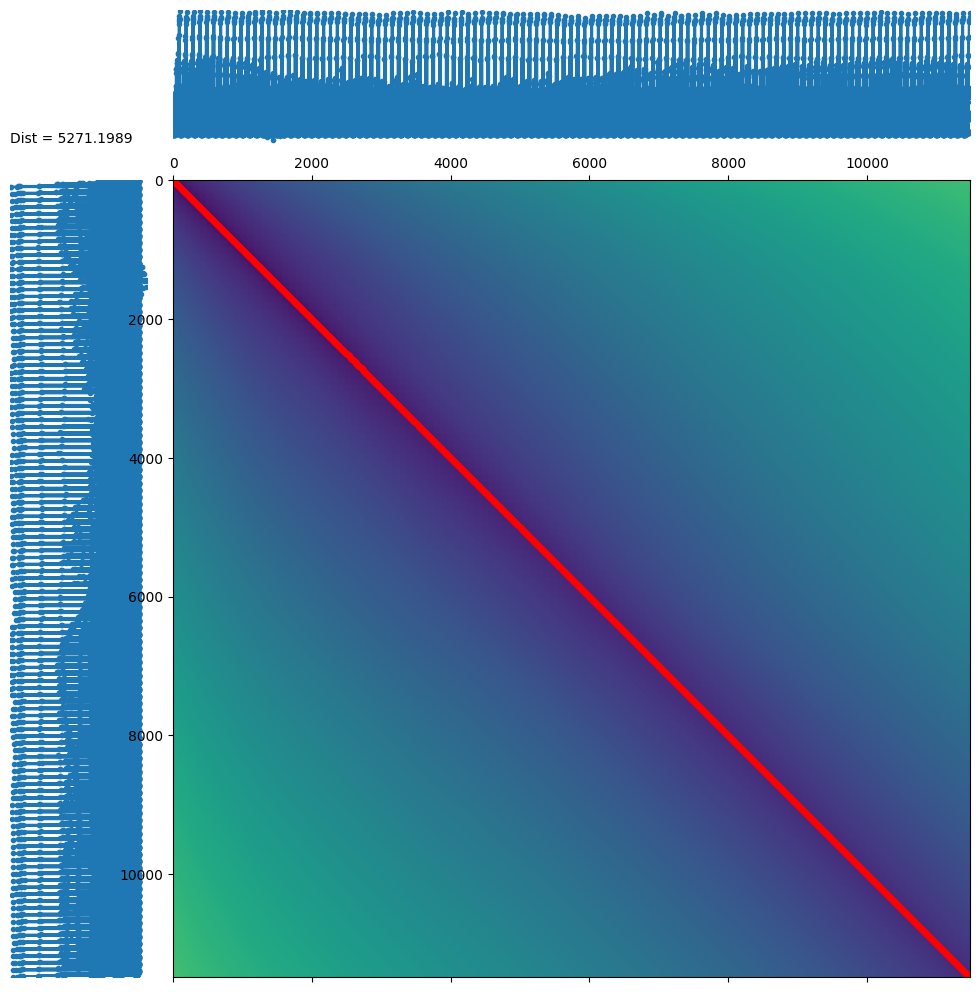

In [51]:
best_path = dtw.best_path(paths)  #take the path with the minimum distance
dtwvis.plot_warpingpaths(np.concatenate(kp1_list, axis=0), np.concatenate(kp2_list, axis=0), paths, best_path)

In [52]:
for i in range(0, Kp1.shape[0], 3):
    print(kp1_list[0][i+1], kp1_list[0][i+2])

329 255
342 234
352 234
361 233
317 235
308 235
298 236
377 247
289 249
349 279
314 280
450 375
231 378
498 526
201 535
507 679
173 686
519 726
157 731
500 731
166 739
486 715
187 726
399 679
281 680
399 888
270 894
402 1057
272 1067
389 1078
287 1090
432 1138
224 1150


In [53]:
print(len(kp2_list))
print(len(kp1_list))
print(kp1_list[0])
print(len(kp1_list[0]))

116
116
[   0  329  255    1  342  234    2  352  234    3  361  233    4  317
  235    5  308  235    6  298  236    7  377  247    8  289  249    9
  349  279   10  314  280   11  450  375   12  231  378   13  498  526
   14  201  535   15  507  679   16  173  686   17  519  726   18  157
  731   19  500  731   20  166  739   21  486  715   22  187  726   23
  399  679   24  281  680   25  399  888   26  270  894   27  402 1057
   28  272 1067   29  389 1078   30  287 1090   31  432 1138   32  224
 1150]
99


### Show all keypoints in both videos at the same time

In [60]:
width = 600
height = 600
threshold = 0.5

cap1=cv2.VideoCapture(v1)
cap2=cv2.VideoCapture(v2)

cpt = 0

size = (600, 600)
out1 = cv2.VideoWriter('filename1.avi', cv2.VideoWriter_fourcc(*'MJPG'), 100, size) # Output video
out2 = cv2.VideoWriter('filename2.avi', cv2.VideoWriter_fourcc(*'MJPG'), 100, size) # Output video

while True:
    success, img1 = cap1.read()
    success1, img2 = cap2.read() 

    if success is False or img1 is None:
        break

    if success1 is False or img2 is None:
        break

    for i in range(0, Kp1.shape[0], 3):
        if len(kp1_list[cpt]) != 0:
            x, y = kp1_list[cpt][i+1], kp1_list[cpt][i+2]
            r1 = cv2.circle(img1, (x, y), 4, (255, 0, 0), thickness=1)
            #out1.write(img1)
    
    for i in range(0, Kp2.shape[0], 3):
        if len(kp2_list[cpt]) != 0:
            x, y = kp2_list[cpt][i+1], kp2_list[cpt][i+2]
            r2 = cv2.circle(img2, (x, y), 4, (255, 0, 0), thickness=1)
            #out2.write(img2)
        
    cpt = cpt+1
    cv2.imshow("Video 1", img1)
    cv2.imshow("Video 2", img2)

    key = cv2.waitKey(50)
    if key == ord('q'):
        break

cv2.destroyAllWindows()
out1.release()
out2.release()
cap1.release()
cap2.release()


In [61]:
print(len(best_path))
print(best_path[4700])

11724
(4554, 4554)


### Show Similar keypoints in both videos at the same time

In [12]:
threshold = 300
keypoints = []
for (i, j), dist in np.ndenumerate(paths):
    if dist < threshold:
        keypoints.append((i, j))

In [12]:
kp1_list

[array([  0, 117,  93,   1, 119,  91,   2, 120,  91,   3, 121,  91,   4,
        117,  90,   5, 115,  90,   6, 114,  89,   7, 122,  93,   8, 113,
         90,   9, 118,  96,  10, 115,  95,  11, 125, 109,  12,  99, 103,
         13, 126, 129,  14,  89, 119,  15, 126, 147,  16,  93, 135,  17,
        127, 152,  18,  94, 139,  19, 128, 153,  20,  96, 138,  21, 127,
        151,  22,  96, 135,  23, 117, 147,  24, 102, 147,  25, 116, 178,
         26, 103, 183,  27, 110, 205,  28, 102, 179,  29, 108, 208,  30,
        103, 175,  31, 108, 216,  32, 101, 189]),
 array([  0, 117,  93,   1, 119,  91,   2, 120,  91,   3, 121,  92,   4,
        116,  90,   5, 115,  90,   6, 114,  89,   7, 122,  93,   8, 112,
         90,   9, 118,  96,  10, 114,  95,  11, 125, 109,  12,  99, 103,
         13, 126, 129,  14,  89, 119,  15, 127, 147,  16,  93, 135,  17,
        127, 152,  18,  94, 139,  19, 127, 153,  20,  96, 138,  21, 127,
        151,  22,  96, 136,  23, 117, 147,  24, 102, 147,  25, 116, 178,
 

In [62]:
allPointsKp1 = []
a = 0
for i in range(0, len(kp1_list)):
    
    for j in range(0, len(kp1_list[i]), 3):
            allPointsKp1.append(i)
            allPointsKp1.append(kp1_list[i][j] + a)
            allPointsKp1.append(kp1_list[i][j+1])
            allPointsKp1.append(kp1_list[i][j+2])
    a = a + 32 
    
allPointsKp1 = np.array(allPointsKp1)
print(allPointsKp1[0:50])

[  0   0 329 255   0   1 342 234   0   2 352 234   0   3 361 233   0   4
 317 235   0   5 308 235   0   6 298 236   0   7 377 247   0   8 289 249
   0   9 349 279   0  10 314 280   0  11 450 375   0  12]


In [63]:
allPointsKp2 = []
a = 0
for i in range(0, len(kp2_list)):
    
    for j in range(0, len(kp2_list[i]), 3):
            allPointsKp2.append(i)
            allPointsKp2.append(kp2_list[i][j] + a)
            allPointsKp2.append(kp2_list[i][j+1])
            allPointsKp2.append(kp2_list[i][j+2])
    a = a + 32 
    
allPointsKp2 = np.array(allPointsKp2)
print(allPointsKp2[0:50])

[  0   0 308 364   0   1 338 342   0   2 306 341   0   3 303 341   0   4
 290 342   0   5 283 341   0   6 276 341   0   7 273 346   0   8 247 347
   0   9 321 384   0  10 288 384   0  11 272 452   0  12]


In [64]:
print(allPointsKp1)
print(allPointsKp1.shape)

[   0    0  329 ... 3712  168 1123]
(15312,)


In [65]:
print(allPointsKp2)
print(allPointsKp2.shape)

[   0    0  308 ... 3712  146 1123]
(15312,)


In [66]:
allSimilarKp1 = []
allSimilarKp2 = []
for i in range(0, len(best_path)): #(keypoints)
        for j in range(0, len(allPointsKp1), 4):
                if allPointsKp1[j+1] == best_path[i][0]: #(keypoints)
                        x, y = allPointsKp1[j + 2], allPointsKp1[j + 3]
                        allSimilarKp1.append(allPointsKp1[j])
                        #allSimilarKp1.append(allPointsKp1[j+1])
                        allSimilarKp1.append((x,y))
                        break
        
        

        for j in range(0, len(allPointsKp2), 4):#(keypoints)
                if allPointsKp2[j+1] == best_path[i][1]:#(keypoints)
                        x, y = allPointsKp2[j + 2], allPointsKp2[j + 3]
                        allSimilarKp2.append(allPointsKp2[j])
                        #allSimilarKp2.append(allPointsKp2[j+1])
                        allSimilarKp2.append((x,y))
                        break
        
        

allSimilarKp1 = np.array(allSimilarKp1)
allSimilarKp2 = np.array(allSimilarKp2)

C:\Users\bouzi\AppData\Local\Temp\ipykernel_11636\3406782120.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  allSimilarKp1 = np.array(allSimilarKp1)
C:\Users\bouzi\AppData\Local\Temp\ipykernel_11636\3406782120.py:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  allSimilarKp2 = np.array(allSimilarKp2)


In [67]:
print(allSimilarKp2.shape)
print(allSimilarKp1.shape)

(7654,)
(7654,)


In [68]:
allSimilarKp2[0:200]

array([0, (308, 364), 0, (338, 342), 0, (306, 341), 0, (303, 341), 0,
       (290, 342), 0, (283, 341), 0, (276, 341), 0, (273, 346), 0,
       (247, 347), 0, (321, 384), 0, (288, 384), 0, (272, 452), 0,
       (166, 455), 0, (266, 573), 0, (115, 611), 0, (334, 608), 0,
       (230, 662), 0, (350, 631), 0, (264, 692), 0, (361, 605), 0,
       (277, 667), 0, (349, 607), 0, (267, 656), 0, (275, 748), 0,
       (206, 755), 0, (310, 889), 0, (174, 919), 0, (341, 1021), 0,
       (135, 1069), 0, (322, 1050), 0, (116, 1096), 0, (419, 1063), 0,
       (184, 1135), 1, (327, 339), 1, (300, 338), 1, (297, 337), 1,
       (290, 341), 1, (283, 341), 1, (276, 341), 1, (265, 341), 1,
       (245, 349), 1, (322, 380), 1, (290, 382), 1, (285, 456), 1,
       (166, 463), 1, (282, 576), 1, (109, 617), 1, (346, 614), 1,
       (236, 662), 1, (360, 623), 1, (268, 684), 1, (371, 603), 1,
       (279, 664), 1, (361, 604), 1, (269, 656), 1, (276, 738), 1,
       (198, 748), 1, (317, 876), 1, (164, 909), 1, (

In [71]:
width = 600
height = 600
threshold = 0.5

cap1=cv2.VideoCapture(v1)
cap2=cv2.VideoCapture(v2)

cpt = 0
step = 0

fourcc = cv2.VideoWriter_fourcc(*'mp4v') # Codec for output video
out1 = cv2.VideoWriter('pose1.mp4', fourcc, 30.0, (600, 600)) # Output video
out2 = cv2.VideoWriter('pose2.mp4', fourcc, 30.0, (600, 600)) # Output video

while True:
    success, img1 = cap1.read()
    success1, img2 = cap2.read() 

    if success is False or img1 is None:
        break

    if success1 is False or img2 is None:
        break


    for i in range(0, allSimilarKp1.shape[0], 4):
        if  allSimilarKp1[i] == cpt:
            step = allSimilarKp1[i]
            print(allSimilarKp1[i])
            x, y = allSimilarKp1[i+1][0], allSimilarKp1[i+1][1]
            r = cv2.circle(img1, (int(x), int(y)), 4, (255, 0, 0), thickness=1)
            out1.write(r)
    
    for i in range(0, allSimilarKp2.shape[0], 2):
        if  allSimilarKp2[i] == cpt and allSimilarKp2[i] == step:
            
            x, y = allSimilarKp2[i+1][0], allSimilarKp2[i+1][1]
            r = cv2.circle(img2, (int(x), int(y)), 4, (255, 0, 0), thickness=1)
            out2.write(r)
        
    cpt = cpt + 1
    
    cv2.imshow("Video 1", img1)
    cv2.imshow("Video 2", img2)

    key = cv2.waitKey(100)
    if key == ord('q'):
        break

cv2.destroyAllWindows()
cap1.release()
cap2.release()
out1.release()
out2.release()


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
24
24


# TESTS

In [104]:
detector = Bt.poseDetector()
cap1=cv2.VideoCapture(videoPush2)
cap2=cv2.VideoCapture(videoPick1)

cv2.namedWindow("Video 1", cv2.WINDOW_NORMAL)
cv2.namedWindow("Video 2", cv2.WINDOW_NORMAL)

allDistances = []
nframes=30 # is the number of saved frames for the function live_tracker
refTime=time.time()
w_angle=100

kp1_list = []
kp2_list = []

try:
    duration=args.max_len
    if duration is None:
        duration=25
except:
    duration=40

while True:
    success, img1 = cap1.read()
    success1, img2 = cap2.read() 

    if success is False or img1 is None:
        break

    if success is False or img2 is None:
        break

    cTime1, Kp1=pose(img1)
    Kp1= np.array(Kp1)
    Kp1 = Kp1.flatten()
    kp1_list.append(Kp1)

    cTime2, Kp2=pose(img2)
    Kp2= np.array(Kp2)
    Kp2 = Kp2.flatten()
    kp2_list.append(Kp2)

    if (cTime1-refTime)>duration:
        break

    if (cTime2-refTime)>duration:
        break

    key=cv2.waitKey(20)
    if key == ord('q'):
        break

    if (cTime1-refTime)>duration:
        print("end ")
        break

    if (cTime2-refTime)>duration:
        print("end ")
        break



In [ ]:
distance, paths= dtw.warping_paths(np.concatenate(kp1_list, axis=0), np.concatenate(kp2_list, axis=0))

(<Figure size 1000x1000 with 4 Axes>,
 [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>])

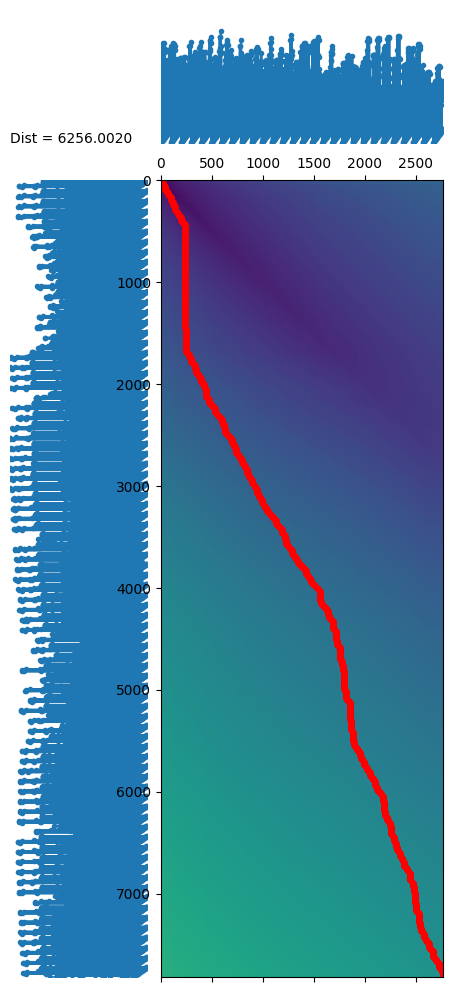

In [20]:
best_path = dtw.best_path(paths)  #take the path with the minimum distance
dtwvis.plot_warpingpaths(np.concatenate(kp1_list, axis=0), np.concatenate(kp2_list, axis=0), paths, best_path)

In [21]:
detector = Bt.poseDetector()
cap1=cv2.VideoCapture(videoPick2)
cap2=cv2.VideoCapture(videoPick1)

allDistances = []
nframes=30 # is the number of saved frames for the function live_tracker
refTime=time.time()
w_angle=100

kp1_list = []
kp2_list = []

try:
    duration=args.max_len
    if duration is None:
        duration=25
except:
    duration=40

while True:
    success, img1 = cap1.read()
    success1, img2 = cap2.read() 

    if success is False or img1 is None:
        break

    if success is False or img2 is None:
        break

    cTime1, Kp1=pose(img1)
    Kp1= np.array(Kp1)
    Kp1 = Kp1.flatten()
    kp1_list.append(Kp1)

    cTime2, Kp2=pose(img2)
    Kp2= np.array(Kp2)
    Kp2 = Kp2.flatten()
    kp2_list.append(Kp2)

    if (cTime1-refTime)>duration:
        break

    if (cTime2-refTime)>duration:
        break

    key=cv2.waitKey(10)
    if key == ord('q'):
        break

    if (cTime1-refTime)>duration:
        print("end ")
        break

    if (cTime2-refTime)>duration:
        print("end ")
        break



In [22]:
distance, paths= dtw.warping_paths(np.concatenate(kp1_list, axis=0), np.concatenate(kp2_list, axis=0))

(<Figure size 1000x1000 with 4 Axes>,
 [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>])

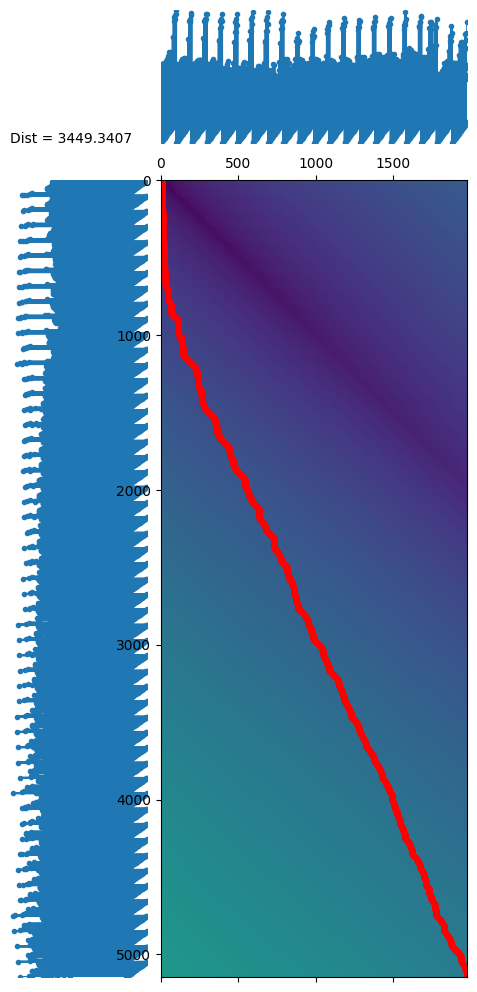

In [23]:
best_path = dtw.best_path(paths)
dtwvis.plot_warpingpaths(np.concatenate(kp1_list, axis=0), np.concatenate(kp2_list, axis=0), paths, best_path)

In [4]:
detector = Bt.poseDetector()
cap1=cv2.VideoCapture(videoPush1)
cap2=cv2.VideoCapture(videoPush1)

allDistances = []
nframes=30 # is the number of saved frames for the function live_tracker
refTime=time.time()
w_angle=100

kp1_list = []
kp2_list = []

try:
    duration=args.max_len
    if duration is None:
        duration=25
except:
    duration=40

while True:
    success, img1 = cap1.read()
    success1, img2 = cap2.read() 

    if success is False or img1 is None:
        break

    if success is False or img2 is None:
        break

    cTime1, Kp1=pose(img1)
    Kp1= np.array(Kp1)
    Kp1 = Kp1.flatten()
    kp1_list.append(Kp1)

    cTime2, Kp2=pose(img2)
    Kp2= np.array(Kp2)
    Kp2 = Kp2.flatten()
    kp2_list.append(Kp2)

    if (cTime1-refTime)>duration:
        break

    if (cTime2-refTime)>duration:
        break

    key=cv2.waitKey(10)
    if key == ord('q'):
        break

    if (cTime1-refTime)>duration:
        print("end ")
        break

    if (cTime2-refTime)>duration:
        print("end ")
        break



In [5]:
distance, paths= dtw.warping_paths(np.concatenate(kp1_list, axis=0), np.concatenate(kp1_list, axis=0))

(<Figure size 1000x1000 with 4 Axes>,
 [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>])

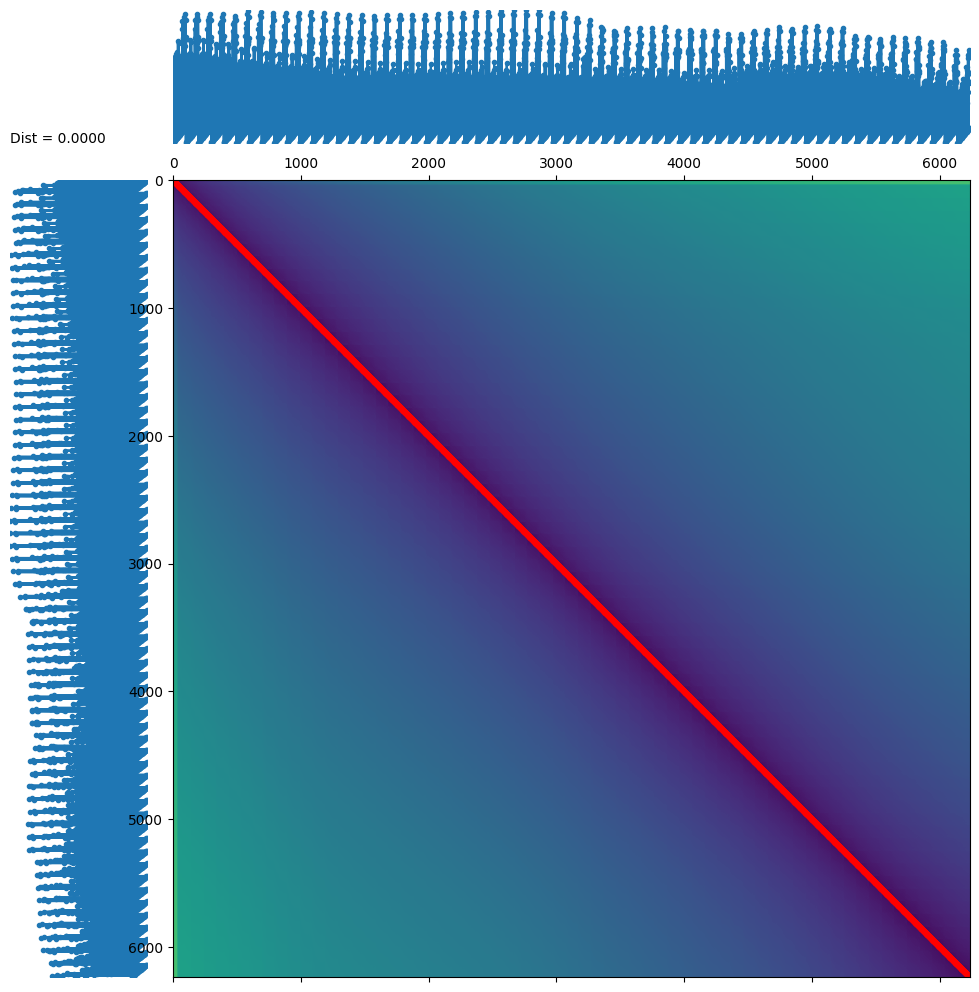

In [6]:
best_path = dtw.best_path(paths)
dtwvis.plot_warpingpaths(np.concatenate(kp1_list, axis=0), np.concatenate(kp2_list, axis=0), paths, best_path)

In [13]:
detector = Bt.poseDetector()
cap1=cv2.VideoCapture(videoPick2)
cap2=cv2.VideoCapture(videoPush1)

allDistances = []
nframes=30 # is the number of saved frames for the function live_tracker
refTime=time.time()
w_angle=100

kp1_list = []
kp2_list = []

try:
    duration=args.max_len
    if duration is None:
        duration=25
except:
    duration=40

while True:
    success, img1 = cap1.read()
    success1, img2 = cap2.read() 

    if success is False or img1 is None:
        break

    if success is False or img2 is None:
        break

    cTime1, Kp1=pose(img1)
    Kp1= np.array(Kp1)
    Kp1 = Kp1.flatten()
    kp1_list.append(Kp1)

    cTime2, Kp2=pose(img2)
    Kp2= np.array(Kp2)
    Kp2 = Kp2.flatten()
    kp2_list.append(Kp2)

    if (cTime1-refTime)>duration:
        break

    if (cTime2-refTime)>duration:
        break

    key=cv2.waitKey(10)
    if key == ord('q'):
        break

    if (cTime1-refTime)>duration:
        print("end ")
        break

    if (cTime2-refTime)>duration:
        print("end ")
        break



### Average of distances

In [12]:
cap1=cv2.VideoCapture(videoPick2)
cap2=cv2.VideoCapture(videoPick1)

allDistances = []
nframes=30 # is the number of saved frames for the function live_tracker
refTime=time.time()
w_angle=100

try:
    duration=args.max_len
    if duration is None:
        duration=25
except:
    duration=40

while True:

    success, img1 = cap1.read()
    success1, img2 = cap2.read() 

    if success is False or img1 is None:
        break
    #print(success)

    if success is False or img2 is None:
        break


    cTime1, Kp1=pose(img1)
    Kp1= np.array(Kp1)
    Kp1 = Kp1.flatten()

    cTime2, Kp2=pose(img2)
    Kp2= np.array(Kp2)
    Kp2 = Kp2.flatten()

    
    distance, paths= dtw.warping_paths(Kp1, Kp2)
    allDistances.append(distance)
    print(distance)
    #dtwvis.plot_warpingpaths(Kp1, Kp2, paths)

    
    
    key=cv2.waitKey(10)
    if key == ord('q'):
        break

    if (cTime1-refTime)>duration:
        print("end ")
        break

    if (cTime2-refTime)>duration:
        print("end ")
        break
    
cap1.release()
cap2.release()
cv2.destroyAllWindows()

inf
inf
179.7386992275175
122.85357137665962
111.98214143335535
101.03464752252071
164.90906585145646
173.91089672588086
200.22737075634788
inf
243.72935810033226
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
345.84100393099715
327.9222468817875
271.60081001351966
242.57988374966297
272.8387802347753
237.27410309597633
267.58550035455954
257.81388635990885
245.57076373216742
263.4331034627197
inf
inf
351.3374446312263
233.40094258592873


In [14]:
import math
filtered_data = [v for v in allDistances if not (math.isinf(v) or math.isnan(v))]
print(np.average(filtered_data))

230.779211001365


DTW on arrays


In [7]:
s1 = np.array([0., 0, 1, 2, 1, 0, 1, 0, 0, 2, 1, 0, 0])
s2 = np.array([0., 1, 2, 3, 1, 0, 0, 0, 2, 1, 0, 0, 0])
path = dtw.warping_path(s1, s2)
print(path)


[(0, 0), (1, 0), (2, 1), (3, 2), (3, 3), (4, 4), (5, 5), (6, 5), (7, 6), (8, 7), (9, 8), (10, 9), (11, 10), (11, 11), (12, 12)]


(<Figure size 432x288 with 2 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>], dtype=object))

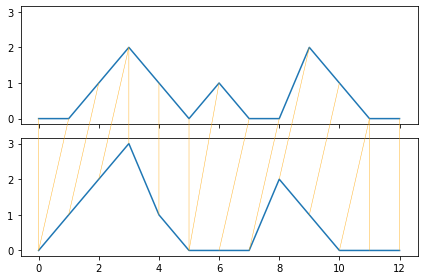

In [8]:
dtwvis.plot_warping(s1, s2, path)